In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 파일 불러오기

In [2]:
dataset = pd.read_csv('QuizData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 데이터 세트 분리

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)

### 선형회귀모델 작성

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [5]:
reg.fit(X,y)

LinearRegression()

### 데이터 시각화 (훈련 세트)

In [6]:
# X 훈련세트 가져오기
X_train, len(X_train)

(array([[262],
        [201],
        [112],
        [155],
        [320],
        [188],
        [129],
        [183],
        [338],
        [288],
        [392],
        [ 94],
        [118],
        [223],
        [ 86]], dtype=int64),
 15)

In [7]:
# y 훈련세트 가져오기
y_train, len(y_train)

(array([183, 147,  68,  92, 201, 131,  76, 152, 187, 152, 199,  80,  62,
        149,  58], dtype=int64),
 15)

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

X_train.shape

(15, 1)

In [9]:
# 예측값 y_pred 알아내기
y_pred = reg.predict(X)
y_pred

array([ 84.45503717, 153.04756918, 187.08978877,  72.26080926,
       103.25447187, 120.02153525, 126.62674204, 196.23545971,
       119.00534959, 117.48107111, 137.80478429, 223.67247251,
        68.19606662,  81.4064802 ,  90.0440583 , 137.80478429,
       170.83081822, 157.62040465,  97.15735792, 115.44869979])

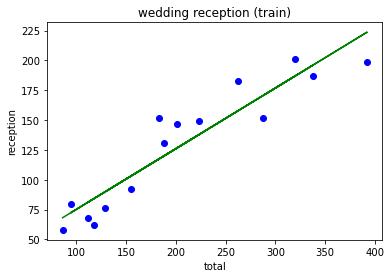

In [10]:
# 데이터 시각화 (훈련세트)
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'green')
plt.title('wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

### 데이터 시각화 (테스트 세트)

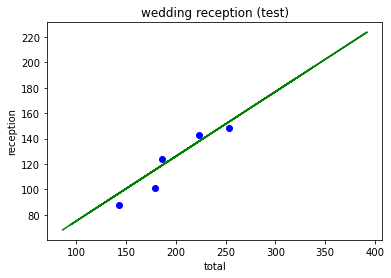

In [11]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'green')
# 테스트세트에 대한 데이터 시각화를 진행할때, 선형회귀선에 대한 입력값은 훈련세트 그대로 가져간다!!
plt.title('wedding reception (test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

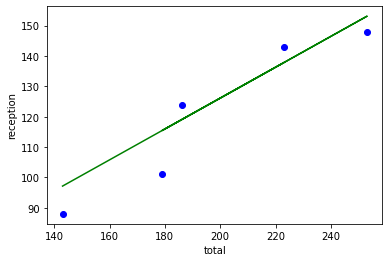

In [12]:
## 참고사항
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, reg.predict(X_test), color = 'green')
# plot 함수안에 테스트 세트 데이터 넣어도 결과는 같으나 x,y축의 범위가 다르므로
# 크기가 달라져서 나온다
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

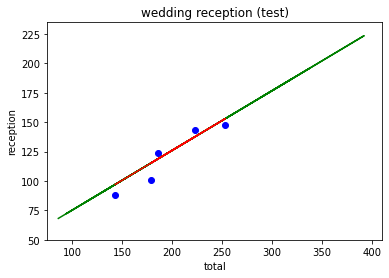

In [13]:
## 참고사항
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'green')
plt.plot(X_test, reg.predict(X_test), color = 'red')
plt.title('wedding reception (test)')
plt.xlabel('total')
plt.xlim(75, 410)
plt.ylabel('reception')
plt.ylim(50, 235)
plt.show()
# 기울기와 절편은 똑같은 결과가 나오지만
# 비교 불편(모델이 끊겨 나오므로) 
# -> 따라서 plot부분에 훈련세트 데이터를 넣어서 X가 더 많이 보여지도록 하자


In [14]:
# 기울기
reg.coef_

array([0.50809283])

In [15]:
# y 절편
reg.intercept_

24.500083270273464

y = 0.5081x + 24.5001

### 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [16]:
# 훈련 세트 평가 점수
reg.score(X_train, y_train)

0.8707088403321211

In [17]:
# 테스트 세트 평가 점수
reg.score(X_test, y_test)

0.8634953212566615

### 결혼식 참석 인원이 300명일 때, 예상되는 식수 인원을 구하시오.

In [18]:
y = reg.coef_ * 300 + reg.intercept_
y

array([176.92793218])

In [19]:
y = float(y)
y

176.92793218052577

In [20]:
print('결혼식 참석 인원 300명에 대한 예상 식수 인원은', round(y), '명 입니다.')

결혼식 참석 인원 300명에 대한 예상 식수 인원은 177 명 입니다.


## 풀이

In [41]:
# X는 2차원 배열 -> 대괄호 2개 사용하자 
total = 300  # 결혼식 참석 인원
y_pred = reg.predict([[total]])
y_pred

array([176.92793218])

In [40]:
# X는 2차원 배열 -> 대괄호 2개 사용하자 
total = 300  # 결혼식 참석 인원
y_pred = reg.predict([[total],[500],[1000]])
y_pred

array([176.92793218, 278.54649812, 532.59291297])

# ------------------------------------------------------------------

< 궁금한 점>  

predict() 함수 내에 total을 넣기 위해 대괄호 2개 쓰는 이유가 뭘까?  
쌤은 X가 2차원 배열이니까 대괄호 2개 사용하라고 했어. 근데 이게 뭔 상관인데?
  
  

<현 상태>  

X는 2차원 넘파이 배열  
total은 1차원 정수형 숫자
  
  

<내 생각>  

reg 객체는 이미 회귀모델링을 적용한 상태야 (위 코드 참조)  
reg에 predict함수를 적용하는 것이므로   
reg 자체, 즉, 모델링 된 모델(모델링 된 상태)에는 기존 데이터인 X가 이미 내포되어있다고 봐도 무방해  
그래서 2차원인 배열 X의 원소마다 정수형인 total == 300 을 X의 원소 하나하나에 넣어주기 위해서  
대괄호 2개를 사용한거야! (차원통일)

여기서 알아가는 점!   

total == 300                 => int  
[total] == [300]             => list, 1차원  
[[total]] == [[300]]         => list, 2차원

In [22]:
X

array([[118],
       [253],
       [320],
       [ 94],
       [155],
       [188],
       [201],
       [338],
       [186],
       [183],
       [223],
       [392],
       [ 86],
       [112],
       [129],
       [223],
       [288],
       [262],
       [143],
       [179]], dtype=int64)

In [23]:
type(X)

numpy.ndarray

In [24]:
X.shape

(20, 1)

In [25]:
X.ndim

2

In [26]:
total

300

In [27]:
# total.shape     
# 오류 원인---> AttributeError: 'int' object has no attribute 'shape'

In [28]:
type(total)

int

In [29]:
a = [total]
type(a)

list

In [30]:
b = [[total]]
type(b)

list

In [31]:
len(b)

1

In [32]:
y_pred

array([176.92793218])

In [33]:
type(y_pred)

numpy.ndarray

In [34]:
y_pred.shape

(1,)

In [35]:
y_pred.ndim

1

In [36]:
y_pred[0]

176.92793218052577

In [37]:
np.around(y_pred[0])

177.0

In [38]:
np.around(y_pred[0]).astype(int)

177

# ------------------------------------------------------------------

In [39]:
print(f'결혼식 참석 인원 {total}명에 대한 예상 식수 인원은 {np.around(y_pred[0]).astype(int)} 명 입니다.')

결혼식 참석 인원 300명에 대한 예상 식수 인원은 177 명 입니다.
